In [6]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/Life%20Expectancy%20Data.csv')

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
X = data[['Alcohol', 'infant deaths']]
X

,Alcohol,infant deaths
0,0.01,62
1,0.01,64
2,0.01,66
3,0.01,69
4,0.01,71
...,...,...
2933,4.36,27
2934,4.06,26
2935,4.43,25
2936,1.72,25


In [18]:
X.isna().sum()

Alcohol          194
infant deaths      0
dtype: int64

In [26]:
X = X.dropna()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)

X_min_max = min_max_scaler.transform(X)
X_min_max

array([[0.        , 0.03444444],
       [0.        , 0.03555556],
       [0.        , 0.03666667],
       ...,
       [0.2474804 , 0.01388889],
       [0.09574468, 0.01388889],
       [0.09350504, 0.01333333]])

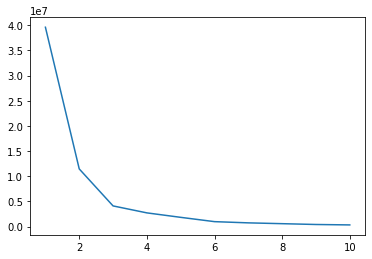

In [28]:
from sklearn.cluster import KMeans

wcss = []

for i in range (1, 11):
  k_means = KMeans(n_clusters = i, init = 'k-means++')
  k_means.fit(X)
  wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)

In [29]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',)
kmeans.fit(X_min_max)

KMeans(n_clusters=3)

In [33]:
X['cluster'] = kmeans.fit_predict(X_min_max)

In [34]:
X

0    1292
2     811
1     641
Name: cluster, dtype: int64

In [58]:
import altair as alt
scatter_plot = alt.Chart(X).mark_circle()

scatter_plot.encode(x='infant deaths', 
                    y='Alcohol',
                    color='cluster',tooltip=['infant deaths', 'Alcohol']).interactive()

alt.Chart(...)